# Greedy Waypoint Visualization

Load the 12x12 grid with multiple shapes and visualize trajectories using greedy nearest-neighbor waypoint selection.

In [1]:
# Setup
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

import numpy as np
import matplotlib.pyplot as plt
from utils.grid_integration import load_and_build_env

## Load 12x12 Grid with Greedy Waypoint Selection

In [5]:
# Load grid with greedy waypoint selection enabled
json_path = Path.cwd() / "grid-150x150(3).json"

sector_env, attackers, grid_data = load_and_build_env(
    json_path,
    default_drone_speed=50.0,
    use_centroid_as_waypoint=True,
    use_shape_centroids_as_waypoints=True  # Enable greedy nearest-neighbor
)

print(f"Grid: {sector_env.width}×{sector_env.height} cells @ {sector_env.cell_size}m/cell")
print(f"Shapes: {len(grid_data.shapes)}")
print(f"Attackers: {len(attackers)}")

# Show shape centroids
print(f"\nShape centroids (waypoints):")
for i, shape in enumerate(grid_data.shapes, 1):
    print(f"  Shape {i}: {tuple(shape.centroid_meters)}")

Grid: 150×150 cells @ 100.0m/cell
Shapes: 2
Attackers: 4

Shape centroids (waypoints):
  Shape 1: (4866.666666666666, 11066.666666666666)
  Shape 2: (10666.666666666668, 3266.666666666668)


## Visualize All Trajectories

Use the environment's built-in `visualize_trajectories()` method.

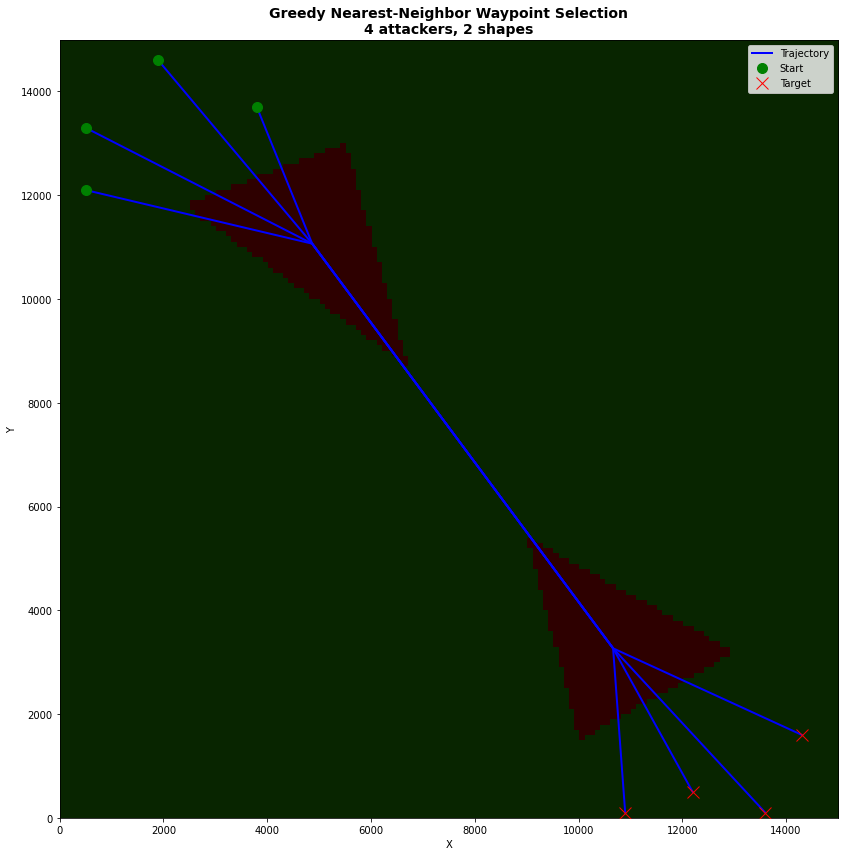

In [6]:
# Visualize all trajectories using environment method
fig, ax = plt.subplots(figsize=(12, 12))
sector_env.visualize_trajectories(ax=ax, show=False, show_sectors=True, show_heatmap=False)
ax.set_title(f'Greedy Nearest-Neighbor Waypoint Selection\n{len(attackers)} attackers, {len(grid_data.shapes)} shapes', 
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Waypoint Analysis

Show how each attacker chose their waypoint order.

In [7]:
print("=" * 70)
print("GREEDY WAYPOINT SELECTION ANALYSIS")
print("=" * 70)

# Get available shape centroids
shape_centroids = [tuple(shape.centroid_meters) for shape in grid_data.shapes]
print(f"\nAvailable shape centroids:")
for i, centroid in enumerate(shape_centroids, 1):
    print(f"  Shape {i}: {centroid}")

# Analyze each attacker's waypoint choices
for i, attacker in enumerate(attackers, 1):
    print(f"\n{'-' * 70}")
    print(f"Attacker {i}:")
    print(f"  Start: {attacker.start_position}")
    print(f"  Target: {attacker.target_position}")
    print(f"  Waypoints: {attacker.waypoints}")
    
    if attacker.waypoints:
        # Calculate path segments
        print(f"\n  Path analysis:")
        current_pos = np.array(attacker.start_position)
        
        # Start to first waypoint
        wp1 = np.array(attacker.waypoints[0])
        dist = np.linalg.norm(wp1 - current_pos)
        print(f"    Start → Waypoint 1: {dist:.2f}m")
        current_pos = wp1
        
        # Between waypoints
        for j in range(1, len(attacker.waypoints)):
            wp = np.array(attacker.waypoints[j])
            dist = np.linalg.norm(wp - current_pos)
            print(f"    Waypoint {j} → Waypoint {j+1}: {dist:.2f}m")
            current_pos = wp
        
        # Last waypoint to target
        target = np.array(attacker.target_position)
        dist = np.linalg.norm(target - current_pos)
        print(f"    Waypoint {len(attacker.waypoints)} → Target: {dist:.2f}m")
        
        # Total distance
        total_with_waypoints = sum(
            np.linalg.norm(
                np.array(attacker.trajectory[i+1]) - np.array(attacker.trajectory[i])
            )
            for i in range(len(attacker.trajectory) - 1)
        )
        direct_distance = np.linalg.norm(target - np.array(attacker.start_position))
        
        print(f"\n  Total path length: {total_with_waypoints:.2f}m")
        print(f"  Direct distance: {direct_distance:.2f}m")
        print(f"  Detour factor: {total_with_waypoints / direct_distance:.2f}x")

print("\n" + "=" * 70)

GREEDY WAYPOINT SELECTION ANALYSIS

Available shape centroids:
  Shape 1: (4866.666666666666, 11066.666666666666)
  Shape 2: (10666.666666666668, 3266.666666666668)

----------------------------------------------------------------------
Attacker 1:
  Start: (500.0, 13300.0)
  Target: (14300.0, 1600.0)
  Waypoints: [(4866.666666666666, 11066.666666666666), (10666.666666666668, 3266.666666666668)]

  Path analysis:
    Start → Waypoint 1: 4904.65m
    Waypoint 1 → Waypoint 2: 9720.08m
    Waypoint 2 → Target: 3997.36m

  Total path length: 18622.09m
  Direct distance: 18092.26m
  Detour factor: 1.03x

----------------------------------------------------------------------
Attacker 2:
  Start: (3800.0, 13700.0)
  Target: (13600.0, 100.0)
  Waypoints: [(4866.666666666666, 11066.666666666666), (10666.666666666668, 3266.666666666668)]

  Path analysis:
    Start → Waypoint 1: 2841.17m
    Waypoint 1 → Waypoint 2: 9720.08m
    Waypoint 2 → Target: 4316.51m

  Total path length: 16877.75m
  Dir